In [ ]:
# https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset/data
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Загружаем данные
data = pd.read_csv('../Lab-3/Global_Superstore2.csv', encoding='latin1')

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


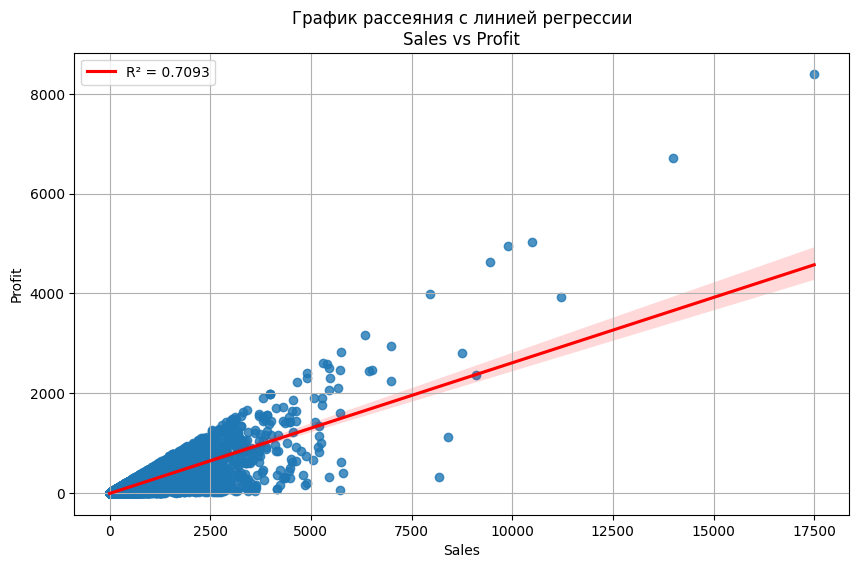

Коэффициент корреляции (r): 0.8422
Коэффициент детерминации (R²): 0.7093


In [26]:
# Фильтруем данные для исключения нулевых и отрицательных значений
filtered_data = data[(data['Profit'] > 0) & (data['Sales'] > 0)]

# Выбираем переменные для анализа
sales = filtered_data['Sales']
profit = filtered_data['Profit']

# Рассчитываем коэффициент корреляции Пирсона
correlation, p_value = pearsonr(sales, profit)

# Коэффициент детерминации (R²)
r_squared = correlation**2

# График рассеяния с линией регрессии
plt.figure(figsize=(10, 6))
sns.regplot(
    x=sales, 
    y=profit, 
    line_kws={'color': 'red', 'label': f'R² = {r_squared:.4f}'}
)
plt.legend()
plt.title('График рассеяния с линией регрессии\nSales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Вывод результатов
print(f"Коэффициент корреляции (r): {correlation:.4f}")
print(f"Коэффициент детерминации (R²): {r_squared:.4f}")


In [27]:
# Случайная выборка (~1/3 от общего объема данных)
random_sample = filtered_data.sample(frac=1/3, random_state=42)

# Стратифицированная выборка (по категории товаров 'Category')
stratified_sample = filtered_data.groupby('Category', group_keys=False).apply(
    lambda x: x.sample(frac=1/3, random_state=42)
)

# Проверяем размеры выборок
print(f"Размер случайной выборки: {len(random_sample)}")
print(f"Размер стратифицированной выборки: {len(stratified_sample)}")


Размер случайной выборки: 12693
Размер стратифицированной выборки: 12692


C:\Users\Arufureddo\AppData\Local\Temp\ipykernel_1524\4132144505.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = filtered_data.groupby('Category', group_keys=False).apply(


In [30]:
# Функция для расчета доверительных интервалов
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(len(data))  # Стандартная ошибка среднего
    margin = sem * t.ppf((1 + confidence) / 2, df=len(data) - 1)
    return mean, mean - margin, mean + margin

# Расчеты для случайной выборки
mean_random, lower_random_95, upper_random_95 = confidence_interval(random_sample['Profit'], confidence=0.95)
_, lower_random_90, upper_random_90 = confidence_interval(random_sample['Profit'], confidence=0.90)
_, lower_random_99, upper_random_99 = confidence_interval(random_sample['Profit'], confidence=0.99)

# Расчеты для стратифицированной выборки
mean_stratified, lower_stratified_95, upper_stratified_95 = confidence_interval(stratified_sample['Profit'], confidence=0.95)
_, lower_stratified_90, upper_stratified_90 = confidence_interval(stratified_sample['Profit'], confidence=0.90)
_, lower_stratified_99, upper_stratified_99 = confidence_interval(stratified_sample['Profit'], confidence=0.99)

# Среднее для генеральной совокупности
mean_population = np.mean(filtered_data['Profit'])

# Вывод результатов
print("Случайная выборка:")
print(f"Среднее: {mean_random:.2f}")
print(f"90% доверительный интервал: ({lower_random_90:.2f}, {upper_random_90:.2f})")
print(f"95% доверительный интервал: ({lower_random_95:.2f}, {upper_random_95:.2f})")
print(f"99% доверительный интервал: ({lower_random_99:.2f}, {upper_random_99:.2f})\n")

print("Стратифицированная выборка:")
print(f"Среднее: {mean_stratified:.2f}")
print(f"90% доверительный интервал: ({lower_stratified_90:.2f}, {upper_stratified_90:.2f})")
print(f"95% доверительный интервал: ({lower_stratified_95:.2f}, {upper_stratified_95:.2f})")
print(f"99% доверительный интервал: ({lower_stratified_99:.2f}, {upper_stratified_99:.2f})\n")

print(f"Среднее генеральной совокупности: {mean_population:.2f}")

# Сравнение среднего генеральной совокупности с выборками
print("Сравнение с генеральной совокупностью:")
print(f"Попадает ли среднее генеральной совокупности в 95% ДИ случайной выборки? {'Да' if lower_random_95 <= mean_population <= upper_random_95 else 'Нет'}")
print(f"Попадает ли среднее генеральной совокупности в 95% ДИ стратифицированной выборки? {'Да' if lower_stratified_95 <= mean_population <= upper_stratified_95 else 'Нет'}")


Случайная выборка:
Среднее: 62.13
90% доверительный интервал: (59.91, 64.35)
95% доверительный интервал: (59.48, 64.77)
99% доверительный интервал: (58.65, 65.60)

Стратифицированная выборка:
Среднее: 64.02
90% доверительный интервал: (61.80, 66.23)
95% доверительный интервал: (61.38, 66.66)
99% доверительный интервал: (60.55, 67.49)

Среднее генеральной совокупности: 62.72
Сравнение с генеральной совокупностью:
Попадает ли среднее генеральной совокупности в 95% ДИ случайной выборки? Да
Попадает ли среднее генеральной совокупности в 95% ДИ стратифицированной выборки? Да


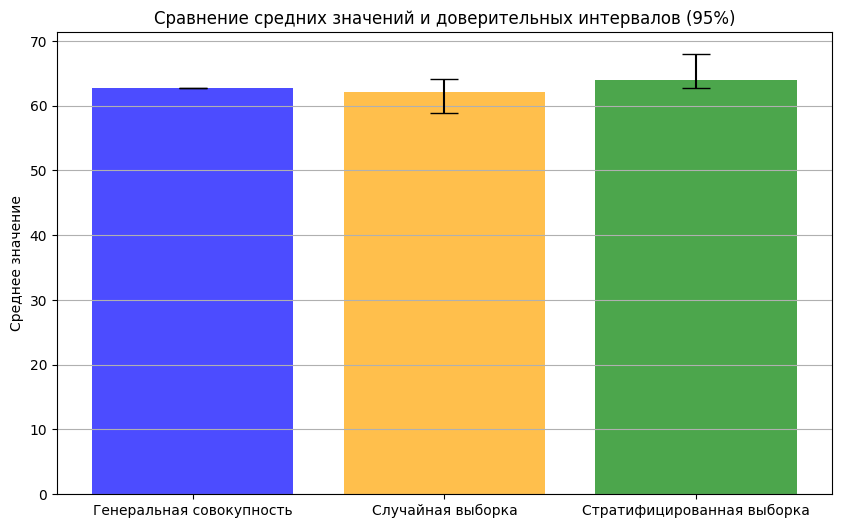

In [31]:
# Визуализация средних значений и доверительных интервалов
labels = ['Генеральная совокупность', 'Случайная выборка', 'Стратифицированная выборка']
means = [mean_population, mean_random, mean_stratified]
lower_bounds = [mean_population, lower_random_95, lower_stratified_95]
upper_bounds = [mean_population, upper_random_95, upper_stratified_95]

plt.figure(figsize=(10, 6))
plt.bar(labels, means, yerr=[
    [mean_population - lb for lb in lower_bounds], 
    [ub - mean_population for ub in upper_bounds]
], capsize=10, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Сравнение средних значений и доверительных интервалов (95%)')
plt.ylabel('Среднее значение')
plt.grid(axis='y')
plt.show()
